In [1]:
# Essential libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
%cd ..
from google.colab import drive
drive.mount('./content/gdrive')

/
Drive already mounted at ./content/gdrive; to attempt to forcibly remount, call drive.mount("./content/gdrive", force_remount=True).


In [4]:
DATADIR = "/content/gdrive/MyDrive/Gait_analysis/all_fixed/data_150"

In [5]:
CATEGORIES = ["normal_resized150", "abnormal_resized150"]

In [6]:
# To make the training data and labels from the datadir and categories
IMG_SIZE = 64
training_data = []
labels = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append(new_array)
            
            if "abnormal_resized150" in category:
                labels.append(0)
            else:
                labels.append(1)
           # except Exception as e:
            #    pass

create_training_data()

In [7]:
# Reshaping the images as 1D array because the model takes images
# as 1D array. Also made the labels a numpy array.

X = np.array(training_data).reshape(len(training_data), 4096).astype(float)
y = np.array(labels)

In [8]:
len(training_data)

276

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 43)

In [11]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

193
193
83
83


K Nearest Neighbour Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [13]:
y_predicted = model.predict(X_test)

In [14]:
model.score(X_test,y_test)

0.9518072289156626

The true label says it is a normal gait
The model predicted it to be a normal gait


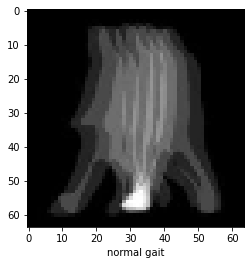

In [15]:
# predict with the trained model 
n = 26
labels = ["abnormal gait","normal gait"]
sample_image = X_test[n]
sample_label = y_test[n]
predicted_label = y_predicted[n]
model.predict([sample_image])
print("The true label says it is a", labels[predicted_label])
print("The model predicted it to be a", labels[sample_label])


# To see the predicted image, we need to change the 1D array to 2D array

example = np.reshape(sample_image, (64, 64))
plt.imshow(example, cmap = "gray")
plt.xlabel(labels[sample_label])
plt.show()

In [16]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       1.00      0.91      0.96        47

    accuracy                           0.95        83
   macro avg       0.95      0.96      0.95        83
weighted avg       0.96      0.95      0.95        83



In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0],
       [ 4, 43]])

Text(15.0, 0.5, 'Truth')

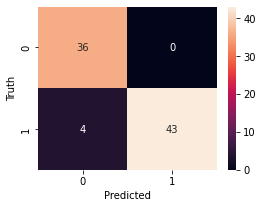

In [18]:
# Let's view a more asthetic confusion matrix

import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2),X_train, y_train, cv=5)

In [20]:
scores

array([0.94871795, 1.        , 0.92307692, 0.94736842, 0.89473684])

In [21]:
np.average(scores)

0.9427800269905532

In [22]:
np.max(scores)

1.0

#Grid Search CV

In [24]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [25]:
print(grid_search.best_params_)

{'n_neighbors': 7}


In [26]:
accuracy = grid_search.best_score_ 
#print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
accuracy

0.9481781376518217

In [27]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X, y)

y_test_hat=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)

#print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

In [28]:
test_accuracy

0.9759036144578314

In [32]:
y_true = y_test

In [33]:
from sklearn.metrics import recall_score
recall_score(y_true, y_predicted, pos_label=0)

1.0

In [34]:
import sklearn
sensitivity = sklearn.metrics.recall_score(y_true , y_predicted)
sensitivity

0.9148936170212766

In [35]:
specificity = sklearn.metrics.recall_score(np.logical_not(y_true) , np.logical_not(y_predicted))
specificity

1.0

In [36]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

In [37]:
print(specificity)
print(sensitivity)
print(precision)
print(recall)

1.0
0.9148936170212766
1.0
0.9148936170212766
